In [5]:
import pandas as pd

train = pd.read_csv('~/data/train.csv')
test = pd.read_csv('~/data/test.csv')

In [6]:
train.shape, test.shape

((39116, 16), (9779, 15))

In [7]:
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0


In [8]:
test.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,2018-05-11,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,2019-06-23,4.31,3,246


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [10]:
test.isna().mean()

id                                0.000000
name                              0.000409
host_id                           0.000000
host_name                         0.000409
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.210451
reviews_per_month                 0.210451
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [11]:
train.isna().mean()

id                                0.000000
name                              0.000307
host_id                           0.000000
host_name                         0.000435
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.204366
reviews_per_month                 0.204366
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

<AxesSubplot:>

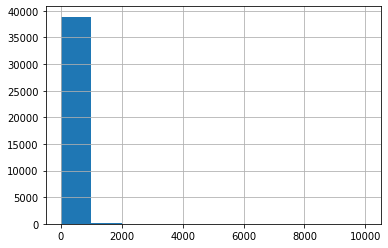

In [12]:
train['price'].hist()

In [13]:
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

# Preprocessing

In [14]:
# missing v

train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [15]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [69]:
train['reviews_per_month'].mode()

0    0.000171
dtype: float64

In [21]:
train.isna().mean()

host_id                           0.0
latitude                          0.0
longitude                         0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [16]:
target = train['price'].copy()
train = train.drop('price', axis=1)

In [17]:
train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [18]:
cols = [
    'host_id', 
        'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'
]

train = train[cols]
test = test[cols]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape


((31292, 8), (7824, 8), (31292,))

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_train, y_train)
pred = model.predict(X_val)

mean_squared_error(y_val, pred)

67796.95068935587

In [22]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

pred = model.predict(X_val)

mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.08285e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


67802.68271430826

In [25]:
# XGBoost

from xgboost import XGBRegressor

model = XGBRegressor(random_state = 42)

model.fit(X_train, y_train)
pred = model.predict(X_val)

mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


65284.980125509835

In [26]:
y_test = pd.read_csv('~/data/y_test.csv')

#XGBoost
pred = model.predict(test)
mean_squared_error(y_test, pred)

50020.96886091523

# 이상 Baseline

In [41]:
train = pd.read_csv('~/data/train.csv')
test = pd.read_csv('~/data/test.csv')


In [61]:
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

<AxesSubplot:>

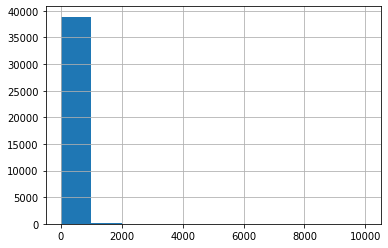

In [42]:
train['price'].hist()

In [43]:
import numpy as np

train['price'][:3]
print(np.log1p(train['price'][:3]))
print(np.expm1(np.log1p(train['price'][:3])))


0    4.262680
1    5.484797
2    5.017280
Name: price, dtype: float64
0     70.0
1    240.0
2    150.0
Name: price, dtype: float64


<AxesSubplot:>

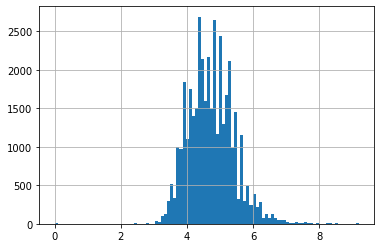

In [44]:
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [87]:
train['price'].describe()

count    39116.000000
mean         4.737628
std          0.694731
min          0.000000
25%          4.248495
50%          4.663439
75%          5.170484
max          9.210440
Name: price, dtype: float64

In [45]:
n_train = train.select_dtypes(exclude='object').copy()
c_train = train.select_dtypes(include='object').copy()

n_test = test.select_dtypes(exclude='object').copy()
c_test = test.select_dtypes(include='object').copy()


In [46]:
n_train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.911600e+04,3.911600e+04,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,31122.000000,39116.000000,39116.000000
mean,1.898464e+07,6.774143e+07,40.728848,-73.952125,4.737628,6.990720,23.272855,1.372444,7.090756,112.980826
std,1.099302e+07,7.881383e+07,0.054499,0.046354,0.694731,20.310323,44.589170,1.683963,32.661136,131.674306
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.412608e+06,7.834978e+06,40.690038,-73.983190,4.248495,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.963650e+07,3.070949e+07,40.723000,-73.955740,4.663439,2.000000,5.000000,0.710000,1.000000,45.000000
75%,2.913445e+07,1.074344e+08,40.762943,-73.936338,5.170484,5.000000,23.000000,2.010000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,9.210440,1250.000000,629.000000,58.500000,327.000000,365.000000


In [49]:
# numeric columns -> scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = [
    'host_id', 
        'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'
]

display(n_train.head(1))

n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.fit_transform(n_test[cols])

display(n_train.head(1))


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,0.343458,0.731742,0.539318,4.26268,0.001601,0.004769,0.001368,0.003067,0.0


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,0.343458,0.731742,0.539318,4.26268,0.001601,0.004769,0.001368,0.003067,0.0


In [50]:
n_train.drop('id', axis=1, inplace=True)

In [51]:
n_test.drop('id', axis=1, inplace=True)

In [52]:
c_train.head(1)

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room,2019-01-01


In [53]:
c_train.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,39104,39099,39116,39116,39116,31122
unique,38420,9977,5,221,3,1702
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,15,338,17331,3099,20299,1138


In [54]:
c_train.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = [ 'neighbourhood_group', 'neighbourhood',
       'room_type'
    
]

display(c_train.head(1))

for col in cols:
    c_train[col] = le.fit_transform(c_train[col])
    c_test[col] = le.transform(c_test[col])
    
    
display(c_train.head(1))
    

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Room in South Harlem near Central Park,Gilles,Manhattan,Harlem,Private room,2019-01-01


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Room in South Harlem near Central Park,Gilles,2,94,1,2019-01-01


In [56]:
del_cols = ['name', 'host_name']
c_train = c_train.drop(del_cols, axis=1)
c_test.drop(del_cols, axis=1, inplace=True)

In [57]:
# merge two df

train = pd.concat([n_train, c_train], axis=1)
test = pd.concat([n_test, c_test], axis=1)

train.shape, test.shape

((39116, 13), (9779, 12))

In [102]:
train['price'].max()

9.210440366976517

In [105]:
target = np.log1p(target)

In [106]:
# 검증 데이터 분리

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape




((31292, 12), (7824, 12), (31292,))

In [104]:
target.head()

0     70
1    240
2    150
3     85
4     44
Name: price, dtype: int64

In [83]:
target.head()

0     70
1    240
2    150
3     85
4     44
Name: price, dtype: int64

In [81]:
train.isna().mean()

host_id                           0.0
latitude                          0.0
longitude                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
neighbourhood_group               0.0
neighbourhood                     0.0
room_type                         0.0
dtype: float64

In [75]:
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)

In [84]:
train.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type
count,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000,39116.000000
mean,0.246935,0.555225,0.550016,4.737628,0.004796,0.037000,0.018533,0.018683,0.309537,1.674328,106.870513,0.505113
std,0.287307,0.132102,0.087225,0.694731,0.016261,0.070889,0.027345,0.100188,0.360752,0.735476,68.593641,0.545981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.028553,0.461150,0.491561,4.248495,0.000000,0.001590,0.000513,0.000000,0.000000,1.000000,51.000000,0.000000
50%,0.111939,0.541050,0.543214,4.663439,0.000801,0.007949,0.006155,0.000000,0.123288,2.000000,94.000000,0.000000
75%,0.391632,0.637868,0.579724,5.170484,0.003203,0.036566,0.027013,0.003067,0.624658,2.000000,178.000000,1.000000
max,1.000000,1.000000,1.000000,9.210440,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,220.000000,2.000000


In [85]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_val.isnull().sum())

host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
dtype: int64
0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
dtype: int64


In [107]:
# RandomForest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_estimators=200)
model.fit(X_train, y_train)
pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

92585.78495927792

In [108]:
# XGBoost

from xgboost import XGBRegressor

model = XGBRegressor(max_depth = 10,
                    learning_rate = 0.02,
                    n_estimators = 500,
                    random_state=42)

model.fit(X_train, y_train)

pred = model.predict(X_val)

pred = np.expm1(pred)
mean_squared_error(y_val, pred)

92666.0033868495

In [ ]:
train['price'].hist(bins=100)

In [109]:
pred.max()

9966.068

In [ ]:
## 회고

- 로그를..잘못 만진듯 하다!